## Chinhook Music Store
The chinhook Records Store Database is like a digital music shop's blueprint, packed with details about artists, songs, albums, customers and purchases. It's a compact version of iTunes, neatly organizing everything into eleven tables. It's a valuable resource for music lovers and data fans, offering insights into how a music store operates.
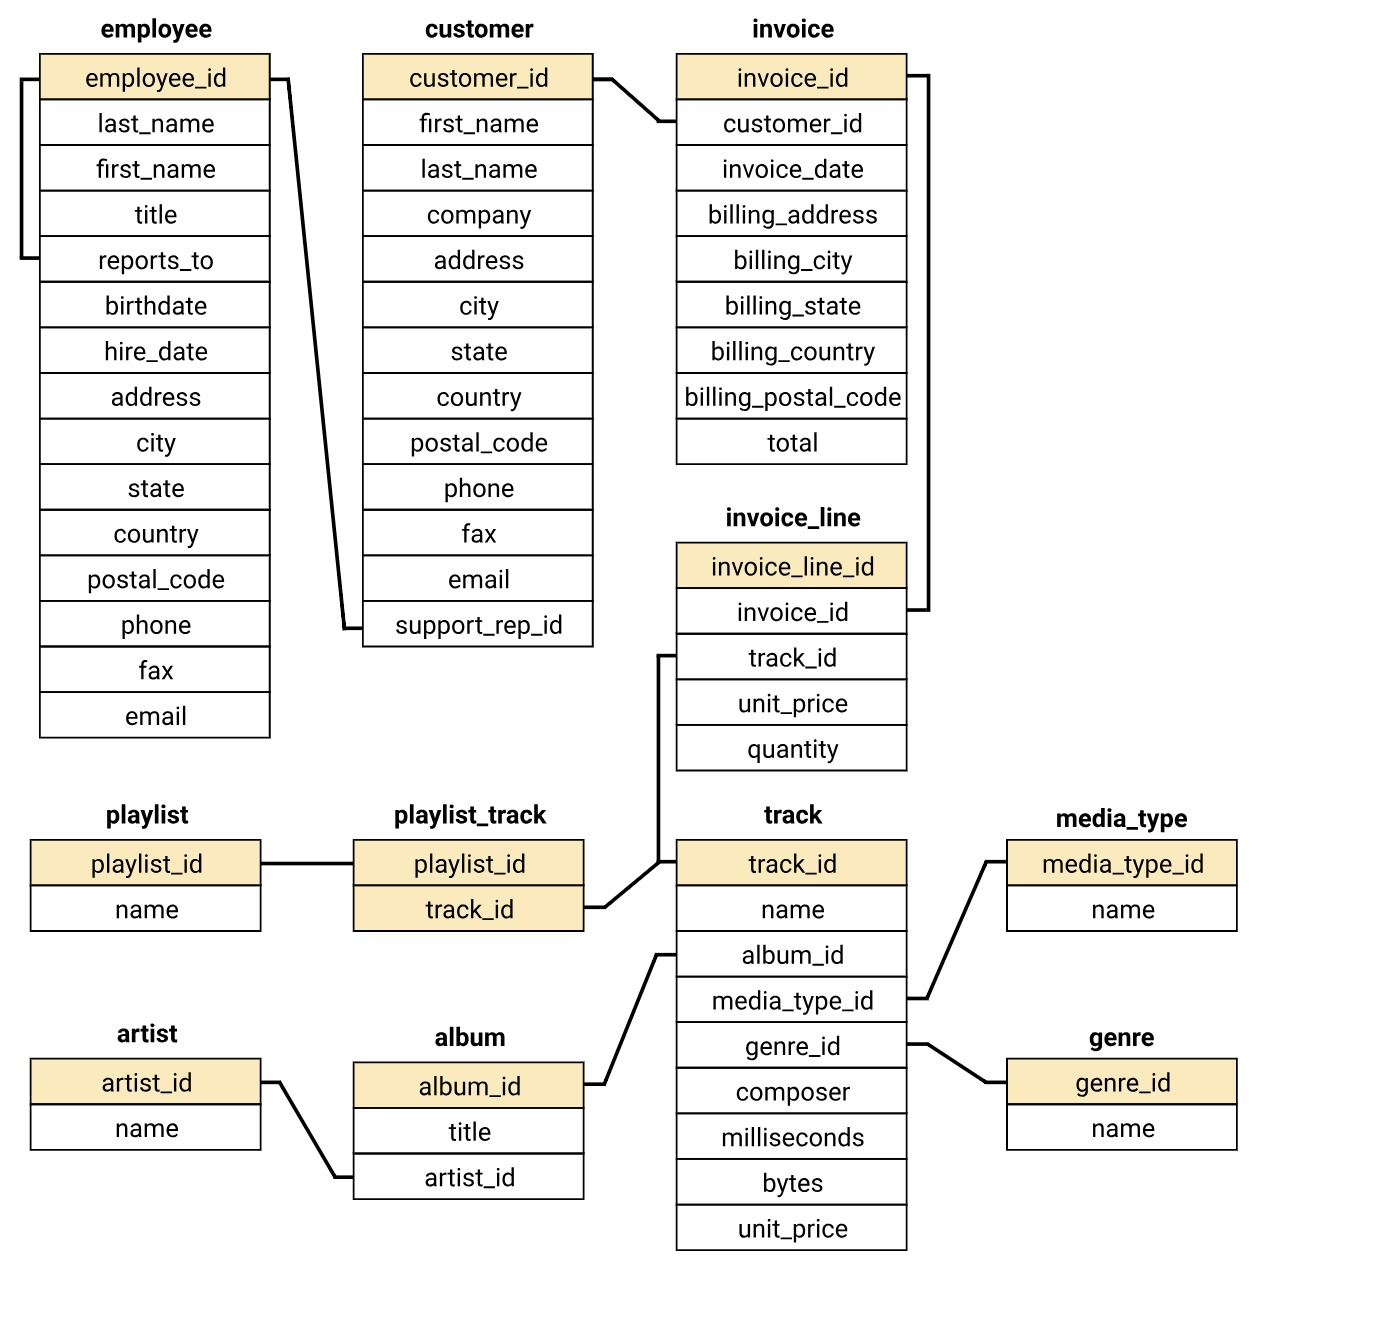

In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
db = 'chinook.db'

def run_query(q):
    with sql.connect(db) as conn:
        return pd.read_sql_query(q, conn)

## In Demand Artists in Each Country

Finding In Demand Artist in each country by finding Artist having Maximum sales in Each country.

In [3]:
q= """SELECT 
    c.country AS customer_country,
    ar.name AS artist_name,
    COUNT(ar.artist_id) AS artist_count,
    SUM(inv.total) AS total_sales
FROM 
    artist AS ar
INNER JOIN 
    album AS al ON al.artist_id = ar.artist_id
INNER JOIN 
    track AS t ON al.album_id = t.album_id
INNER JOIN 
    invoice_line AS il ON il.track_id = t.track_id
INNER JOIN 
    invoice AS inv ON inv.invoice_id = il.invoice_id
INNER JOIN 
    customer AS c ON c.customer_id = inv.customer_id
GROUP BY 
    c.country, ar.name
ORDER BY 
    c.country, total_sales DESC;
"""

run_query(q)

,customer_country,artist_name,artist_count,total_sales
0,Argentina,Green Day,14,177.21
1,Argentina,Nirvana,3,25.74
2,Argentina,Iron Maiden,2,16.83
3,Argentina,Eric Clapton,2,15.84
4,Argentina,The Doors,1,9.90
...,...,...,...,...
1200,United Kingdom,System Of A Down,1,4.95
1201,United Kingdom,Men At Work,1,4.95
1202,United Kingdom,Billy Cobham,1,4.95
1203,United Kingdom,The Who,1,3.96


In [4]:
q= """
With artists as
    (SELECT 
    c.country AS customer_country,
    ar.name AS artist_name,
    COUNT(ar.artist_id) AS artist_sales,
    SUM(inv.total) AS total_sales
FROM 
    artist AS ar
INNER JOIN 
    album AS al ON al.artist_id = ar.artist_id
INNER JOIN 
    track AS t ON al.album_id = t.album_id
INNER JOIN 
    invoice_line AS il ON il.track_id = t.track_id
INNER JOIN 
    invoice AS inv ON inv.invoice_id = il.invoice_id
INNER JOIN 
    customer AS c ON c.customer_id = inv.customer_id


GROUP BY 
    c.country, ar.name), 
    
t2 as
(Select * from artists

Order by 1, 3 DESC)

Select * from t2
Group by 1

"""

best_artist=run_query(q)
best_artist

,customer_country,artist_name,artist_sales,total_sales
0,Argentina,Green Day,14,177.21
1,Australia,The Clash,18,320.76
2,Austria,Miles Davis,15,202.95
3,Belgium,Godsmack,12,142.56
4,Brazil,Metallica,36,308.88
5,Canada,Queen,36,459.36
6,Chile,Red Hot Chili Peppers,15,222.75
7,Czech Republic,Kiss,21,406.89
8,Denmark,Jamiroquai,4,27.72
9,Finland,The Police,14,159.39


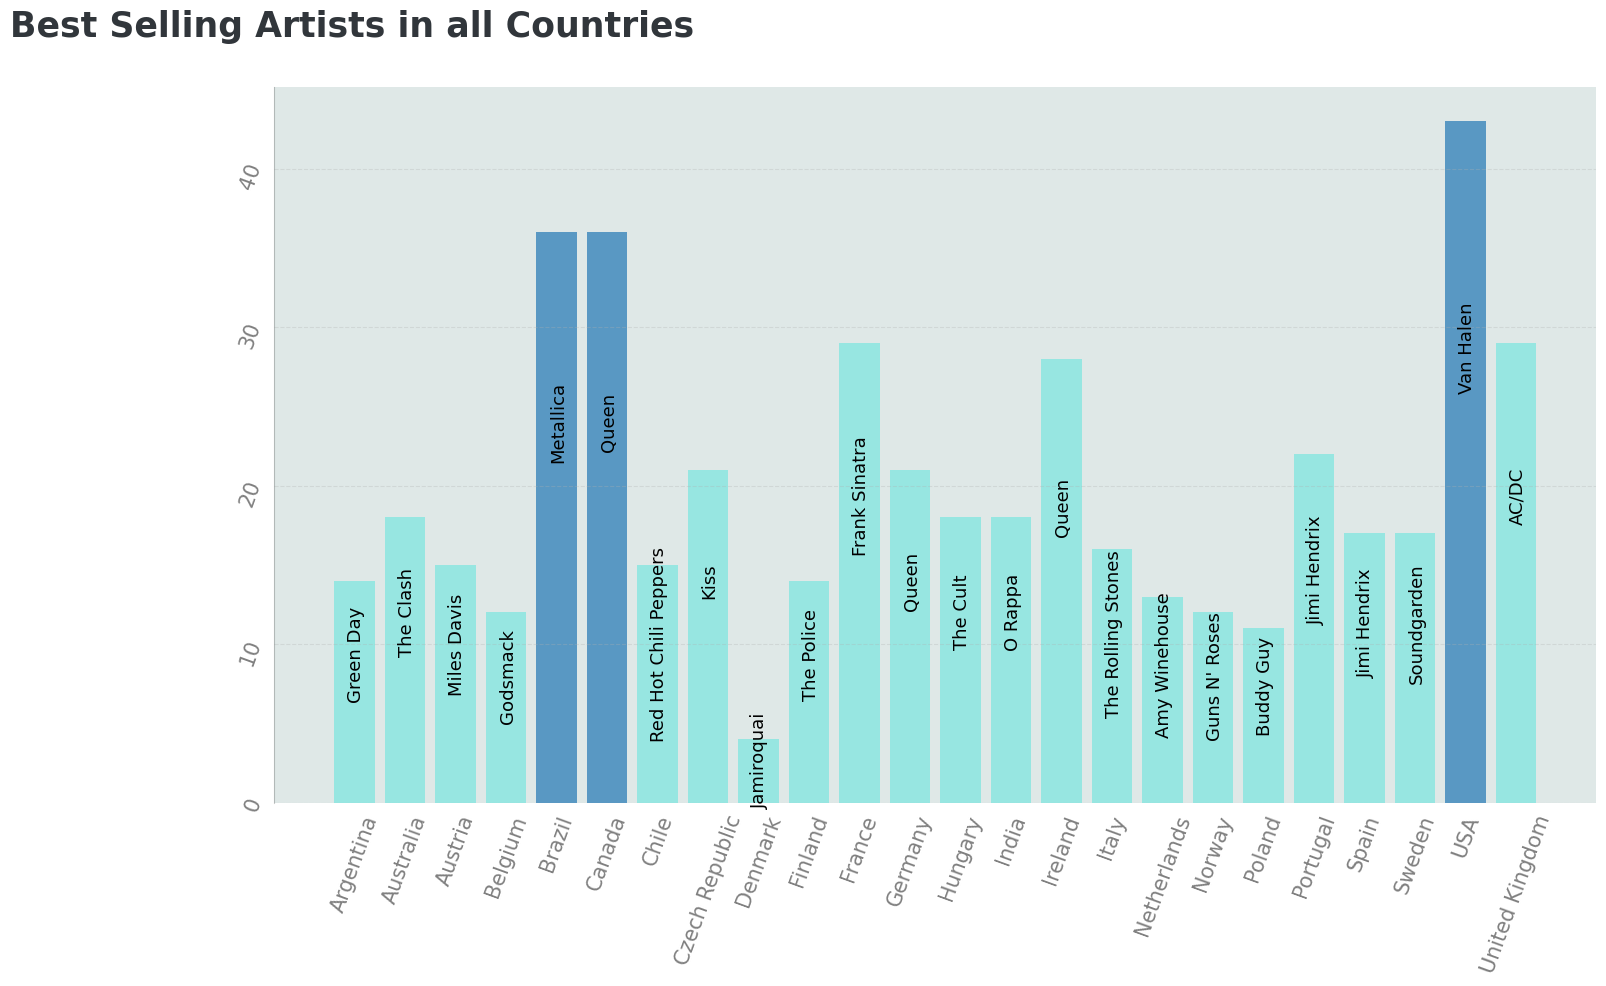

In [5]:
popular_artist = best_artist.nlargest(3,['artist_sales'])
pop_country = popular_artist['customer_country']
cmap = best_artist['customer_country'].apply(lambda x: '#0064AB' if x in pop_country.values else '#67e6dd')
fig, ax =plt.subplots(figsize = (16,10))
bars= ax.bar(best_artist['customer_country'], best_artist['artist_sales'], alpha = 0.6, color= cmap)

ax.set_facecolor('#dfe8e7')
for bar,artists in zip(bars, best_artist['artist_name']):
    ax.text(bar.get_x()+0.25, bar.get_y()+bar.get_height()/1.5, f'{artists}', va='center', ha='left', rotation=90, fontsize='13')

ax.set_xticks(best_artist['customer_country'])


plt.text(-0.2, 1.07, "Best Selling Artists in all Countries", fontsize=25, fontweight='bold', 
         transform=plt.gca().transAxes, color='#31363b')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.spines['left'].set_color('#000000')
ax.spines['left'].set_alpha(0.2)


ax.tick_params(left=False, bottom= False, labelsize = 15, labelcolor='grey', rotation =70)
ax.grid(axis='y', linestyle='--', alpha =0.3)
    
plt.tight_layout()

plt.show()



### Conclusion

The conclusion drawn from the bar chart graph data analysis indicates that certain artists have significantly higher sales in specific countries, suggesting potential opportunities for Chinook to focus their marketing and promotional efforts. Let's break down the analysis in detail of some famous artist:

* **Van Halen in the USA:** The data analysis reveals that Van Halen is the most popular artist in the USA, with the highest sales compared to other artists. This suggests that Van Halen has a strong fan base or appeal in the USA market. Chinook can leverage this popularity by organizing targeted marketing campaigns, promotions, or events featuring Van Halen's music to further capitalize on the existing fan base and attract new customers.

* **Metallica in Brazil:** The analysis indicates that Metallica is popular in Brazil, with significant sales in the country. This suggests that Metallica has a considerable fan base or market presence in Brazil. Chinook can explore opportunities to collaborate with Metallica or promote their music through targeted campaigns in Brazil to maximize sales and customer engagement.

* **Queen in Canada:** The data shows that Queen has good sales in Canada, indicating a strong following or demand for Queen's music in the Canadian market. Chinook can strategize marketing initiatives, such as organizing concerts, featuring Queen's music prominently in promotions, or partnering with local events to increase visibility and sales of Queen's albums in Canada. Further Queen is also famous in Germany and Ireland.

* **AC/DC in the UK:** The analysis highlights AC/DC as a popular artist with good sales in the UK market. This suggests that AC/DC has a significant presence or fan base in the UK. Chinook can devise strategies to further promote AC/DC's music in the UK, such as targeted advertising campaigns, collaborations with local businesses, or featuring AC/DC prominently in UK-specific promotions.


# Genre Analysis for Album Selection: Identifying Top-Selling Genres in the USA
Chinhook record store wants to select three albums to add from a list of four new artisits, each belonging to different genres. The genres include Hip-Hop, Plunk, Pop and Blues. The record label focuses on US artists and plans to advertise in the USA
<table ><tr><th >Artist <th><th> Genre <th><th>
<tr><td> Regal <td><td> Hip-Hop <td><td>
<tr><td> Red Tone <td><td> Punk <td><td> 
<tr><td> Meteor and the Girls <td><td> Pop <td><td> 
<tr><td> Slim Jim Bites <td><td> Blues <td><td></table>


    To decide which albums to choose, we need to find out which genres are most popular in the USA. We'll do this by querying the database to see which genres sell the most tracks in the USA. Based on this information, we'll make recommendation for the three artists whose albums Chinhoo should purchase.

## We can change the scenario based on same analysis!!

In [6]:
q = """ 
WITH usa_tracks AS
    (
    SELECT t.genre_id AS genre_id, il.invoice_line_id
        FROM track as t
     INNER JOIN invoice_line as il ON il.track_id = t.track_id
     INNER JOIN invoice as i ON i.invoice_id = il.invoice_id
     WHERE i.billing_country = 'USA'

    )
Select g.name genre_name,
    COUNT(usa.genre_id) num_purchases,
    ROUND((CAST(COUNT(usa.genre_id) AS FLOAT)/(SELECT COUNT(genre_id)
    FROM usa_tracks))*100,2) AS percentage_sold
    
From usa_tracks AS usa
INNER JOIN genre as g ON g.genre_id = usa.genre_id

GROUP BY g.name
ORDER BY num_purchases DESC

"""

usa_genre= run_query(q)
usa_genre

,genre_name,num_purchases,percentage_sold
0,Rock,561,53.38
1,Alternative & Punk,130,12.37
2,Metal,124,11.80
3,R&B/Soul,53,5.04
4,Blues,36,3.43
5,Alternative,35,3.33
6,Pop,22,2.09
7,Latin,22,2.09
8,Hip Hop/Rap,20,1.90
9,Jazz,14,1.33


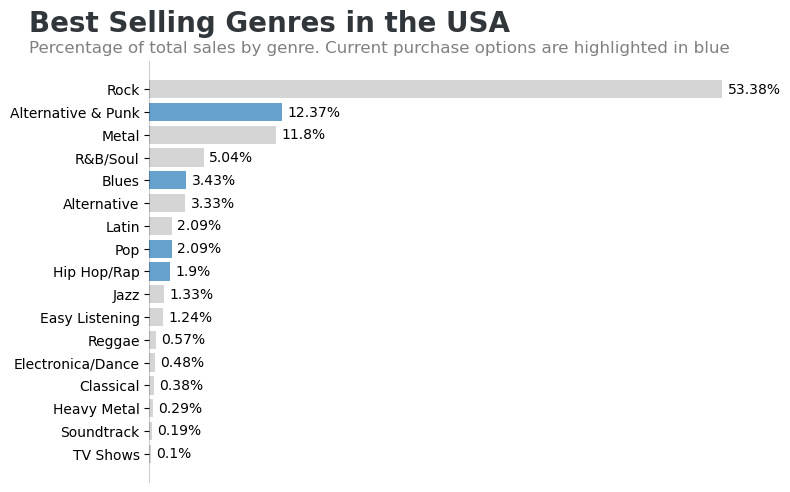

In [7]:
usa_genre = usa_genre.sort_values(by='percentage_sold')

album_options = ['Hip Hop/Rap', 'Alternative & Punk', 'Blues', 'Pop']
cmap = usa_genre['genre_name'].apply(lambda x: '#0064AB' if x in album_options else '#BABABA')

fig, ax =plt.subplots(figsize = (8,5))
bars= ax.barh(usa_genre['genre_name'], usa_genre['percentage_sold'], height=0.8, color=cmap, alpha = 0.6)

for bar,percentage in zip(bars, usa_genre['percentage_sold']):
    ax.text(bar.get_width()+0.5, bar.get_y()+ bar.get_height()/2, f'{percentage}%', va='center', ha='left', fontsize='10')
ax.set_yticks(usa_genre['genre_name'], fontsize=10.5, color='grey')
ax.set_xticks([])

plt.text(-0.2, 1.07, "Best Selling Genres in the USA", fontsize=20, fontweight='bold', transform=plt.gca().transAxes, color='#31363b')

plt.text(-0.2, 1.02, 'Percentage of total sales by genre. Current purchase options are highlighted in blue',
         fontsize=12, transform=plt.gca().transAxes, color='gray')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.spines['left'].set_color('#000000')
ax.spines['left'].set_alpha(0.2)

plt.tight_layout()

plt.show()



### Results

>Based on the genre sales pattern in the USA. Chinook should select these options from the list of availaible albums.

>- **Plunk:** Red Tone
>- **Blues:** Slim Jim Biltes
>- **Pop:** Meteor and the Girls

>It's worth nothing that these three genres only make up 17% of total sales. To maximize profitablity, the company should be on the lookout for Rock songs since they account for 53% of the sales in the US market.

## Employee Sales Performance Analysis

#### The Situation

After an initial purchase, each Chinook customer is assigned to a sales support agent. The company asked us to analyze purchases from customer belonging to each sales agent. They want to know if some agents are performing better or worse than others.

#### Analysis

To answer this question, we need to extract the names of the sales executives, their hire dates, the number of account they handle, and the total purchases made by these accounts. We will also compute the average sales for each account that the sales executives manage.

In [8]:
q = """ 
    With t1 AS (Select em.first_name || ' '|| em.last_name AS sales_rep_name,
            em.hire_date,
            Count(cu.customer_id) AS num_invoices,
            CAST(SUm(inv.total) AS Integer) AS total_sales
        FROM employee em
        JOIN customer cu
            On em.employee_id = cu.support_rep_id
        JOIN invoice inv
            On inv.customer_id = cu.customer_id
        Group by 1
        Order by 4 DESC
        )
      SELECT *, 
          ROUND (CAST(total_sales AS Float)/num_invoices, 2)
          AS sales_per_customer
        FROM t1;
"""

em_df= run_query(q)
em_df

,sales_rep_name,hire_date,num_invoices,total_sales,sales_per_customer
0,Jane Peacock,2017-04-01 00:00:00,212,1731,8.17
1,Margaret Park,2017-05-03 00:00:00,214,1584,7.40
2,Steve Johnson,2017-10-17 00:00:00,188,1393,7.41


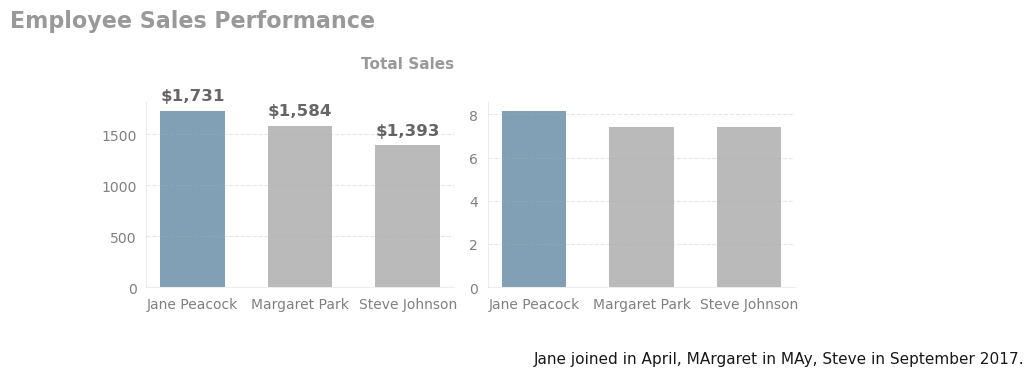

In [9]:
sales_rep_name = em_df['sales_rep_name'].values
total_sales = em_df['total_sales'].values
sales_per_customer = em_df['sales_per_customer'].values

fig, axes =plt.subplots(nrows=1, ncols=2, figsize = (10,8))

axes[0].bar(sales_rep_name, total_sales, color = '#BABABA', width=0.6)
axes[0].bar(sales_rep_name[0], total_sales[0], color = '#0064Ab', alpha=0.3, width=0.6)

axes[0].text(x=2, y=2150, s = 'Total Sales', size = 11, fontweight='bold', alpha =0.4, ha='center')

for sales, index in zip(total_sales, range(3)):
    axes[0].text(x=index, y=sales+100, s='${:,}'.format(sales), ha='center',
                fontweight='bold', alpha = 0.6, size=12)

axes[0].text(x=0, y=2550, s='Employee Sales Performance', size=16, 
             fontweight='bold', alpha = 0.4, ha='center')

axes[1].bar(sales_rep_name, sales_per_customer, color='#BABABA', width = 0.6)
axes[1].bar(sales_rep_name[0], sales_per_customer[0], color = '#0064AB', alpha = 0.3, width = 0.6)

axes[1].text(x=0, y=-3.5, s = 'Jane joined in April, MArgaret in MAy, Steve in September 2017.',
             size = 11, alpha =0.9)
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#DDD')
    ax.spines['left'].set_alpha(0.5)
    ax.spines['bottom'].set_color('#DDD')
    ax.spines['bottom'].set_alpha(0.5)
    
    ax.tick_params(left=False, bottom= False, labelsize = 10, labelcolor='grey')
    ax.grid(axis='y', linestyle='--', alpha =0.3)
    

plt.tight_layout(rect=[0,0.03,1,0.95])

plt.show()



### Results
>- Of the three sales employees, Jane achieved the highest total sales of **1,731 dollars**. Margaret Park comes second, and Steve occupies the last place with **1,393 dollars** in sales. This difference in sales is understandable, considering that Jane and Margaret were employed about five months before Steve.
>- Jane's average sales numbers support her leading position. She has achieved **8.17 dollars** in sales per customer, the highest of the three employees. Steve also performs marginally better than Margaret despite the difference in their employment dates.

### Sales by Country

#### The Situation
Chinook wants to understand how sales are distributed across different countries. The company intends to identify countries with growth potential and may even run advertising campaigns in these countries.

#### Analysis
To answer this question, we will write a query that collates data on purchases from different countries. For each country, we will include the total number of customers, total sales value, average sales per customer, and the average order value. Where a country has only one customer, we will collect it into an "Other" group:

In [10]:
q = """ 
    -- Collate the number of customer in each country
    With t1 AS (Select country, Count(customer_id) as num_customers
                    From customer
                    Group by country
                ),
    -- Collate the total sales in each country
     t2 AS (Select cu.country,
                 Round(Sum(inv.total),2) as total_sales,
                 Count(inv.invoice_id) as num_sales
            From customer cu
            Join invoice inv
                On cu.customer_id = inv.customer_id
            Group by 1
                ),
                
    -- Group countries with only one customer as 'Others'
    t3 AS (Select Case when t1.num_customers = 1 THEN 'Others'
                        ELSE t1.country END AS countries,
                  SUM(t1.num_customers) AS num_customers,
                  SUM(t2.total_sales) AS total_sales,
                  SUM(t2.num_sales) AS num_sales
                  
            From t1
            Join t2
                ON t1.country = t2.country
            Group by 1
        )

    -- Calculate relevant sales metrics
    SELECT countries,
            num_customers,
            total_sales,
            Round(total_sales/ num_sales, 2) AS avg_order_value,
            Round(total_sales / num_customers, 2) AS sales_per_customer
        From ( 
            Select *,
                CASE When countries = 'Others' THEN 1
                        ELSE 0 END AS sort
                From t3
                )
        Order by sort, num_customers DESC;
"""

df_country = run_query(q)
df_country

,countries,num_customers,total_sales,avg_order_value,sales_per_customer
0,USA,13,1040.49,7.94,80.04
1,Canada,8,535.59,7.05,66.95
2,Brazil,5,427.68,7.01,85.54
3,France,5,389.07,7.78,77.81
4,Germany,4,334.62,8.16,83.66
5,United Kingdom,3,245.52,8.77,81.84
6,Czech Republic,2,273.24,9.11,136.62
7,India,2,183.15,8.72,91.58
8,Portugal,2,185.13,6.38,92.57
9,Others,15,1094.94,7.45,73.00


In [11]:
avg_cust_purchase = df_country.sales_per_customer.mean()
print(avg_cust_purchase)
df_country['pcent_customer'] = round(100*df_country.num_customers / df_country.num_customers.sum(), 1)
df_country['pcent_sales']= round(100*df_country.total_sales / df_country.total_sales.sum(), 1)
df_country['cust_purchase_diff'] = round(100* (df_country.sales_per_customer - avg_cust_purchase)/ 
                                            avg_cust_purchase, 2)

df_country

86.96100000000001


,countries,num_customers,total_sales,avg_order_value,sales_per_customer,pcent_customer,pcent_sales,cust_purchase_diff
0,USA,13,1040.49,7.94,80.04,22.0,22.1,-7.96
1,Canada,8,535.59,7.05,66.95,13.6,11.4,-23.01
2,Brazil,5,427.68,7.01,85.54,8.5,9.1,-1.63
3,France,5,389.07,7.78,77.81,8.5,8.3,-10.52
4,Germany,4,334.62,8.16,83.66,6.8,7.1,-3.80
5,United Kingdom,3,245.52,8.77,81.84,5.1,5.2,-5.89
6,Czech Republic,2,273.24,9.11,136.62,3.4,5.8,57.10
7,India,2,183.15,8.72,91.58,3.4,3.9,5.31
8,Portugal,2,185.13,6.38,92.57,3.4,3.9,6.45
9,Others,15,1094.94,7.45,73.00,25.4,23.2,-16.05


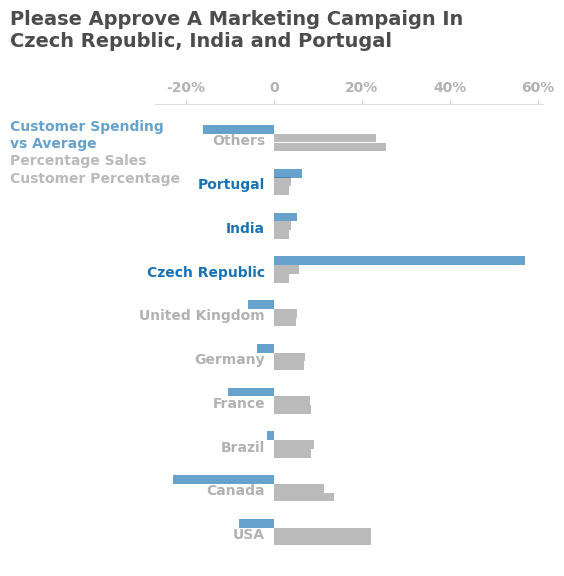

In [12]:
y_labs = df_country.countries.values
y_axes = np.arange(df_country.countries.size)

fig = plt.figure(figsize = (5, 6))
plt.barh(y_axes-0.3, df_country.pcent_customer, height =0.2, color='#BABABA')
plt.barh(y_axes-0.1, df_country.pcent_sales, height =0.2, color='#BABABA')
plt.barh(y_axes+0.1, df_country.cust_purchase_diff, height =0.2, color='#0064AB', alpha=0.6)

color_map=['','','','','','','Yes','Yes','Yes','']

for loc,label,color in zip(y_axes, y_labs, color_map):
    if color == 'Yes':
        plt.text(x=-2, y=loc-0.25, s=label, ha='right', color='#0064AB',
                alpha = 0.9, size=10, fontweight='bold')
    else:
        plt.text(x=-2, y=loc-0.25, s=label, ha='right', alpha = 0.3, size=10, fontweight='bold')
        
plt.text(x=-60, y=8.7, s='Customer Spending\nvs Average', color='#0064AB',
        size=10, alpha=0.6, fontweight='bold')
plt.text(x=-60, y=8.3, s='Percentage Sales', color='#BABABA', size=10, fontweight='bold')
plt.text(x=-60, y=7.9, s='Customer Percentage', color='#BABABA', size=10, fontweight='bold')

plt.text(x=-60, y=11, s='Please Approve A Marketing Campaign In\nCzech Republic, India and Portugal',
        alpha=0.7, size=14, fontweight='bold')

for ax in fig.get_axes():
    plt.sca(ax)
    sns.despine(left=True, bottom=True, top=False)
    ax.tick_params(left=False, bottom=False, color='#ddd')
    ax.xaxis.set_ticks_position('top')
    ax.spines['top'].set_color('#DDD')
    plt.yticks([])
    plt.xticks([-20,0,20,40,60],['-20%','0','20%','40%','60%'],
              size=10, alpha = 0.3, fontweight = 'bold')
    

#### Results
> * The Majority of Chinook sales arise from **US** and **Canada**. These two countries dominate in customer base as well as sales. However, customers spend lesser per invoice in these countries.
> * Although the **Czech Republic, Portugal, and India** record fewer customers and lesser sales values, customers spend more per invoice than in other countries. To increase revenue from these three markets, Chinook could run marketing campaigns to expand its customer base.


Since the data from each country are relatively few, the initial marketing campaigns should be small. They should aim to collect and analyze customer data so that the right trends are confidently identified.

### How Many Tracks Never Sell?
To answer this question, we will have to distriguish between the entire inventory of tracks in the track table and the distinct instances of tracks from the **invoice line** table.

In [13]:
q = """ 
    With all_and_purchased AS
    (
    Select t.track_id all_tracks, il.track_id AS purchased_tracks
        From track AS t
        Left Join invoice_line il on il.track_id = t.track_id
    )
Select Count(Distinct a.all_tracks) total_tracks,
       Count(Distinct a.purchased_tracks) tracks_purchased,
       Count(Distinct a.all_tracks) - Count(Distinct a.purchased_tracks) not_purchased,
       Round(Count(Distinct a.purchased_tracks)/CAST(Count(Distinct a.all_tracks) AS float),2) percent_purchased
       
From all_and_purchased AS a;
    
"""

purchased = run_query(q)
purchased

,total_tracks,tracks_purchased,not_purchased,percent_purchased
0,3503,1806,1697,0.52


In [14]:
purchased = purchased.T
purchased = purchased.iloc[[1,2],0]
purchased_list = purchased.tolist()

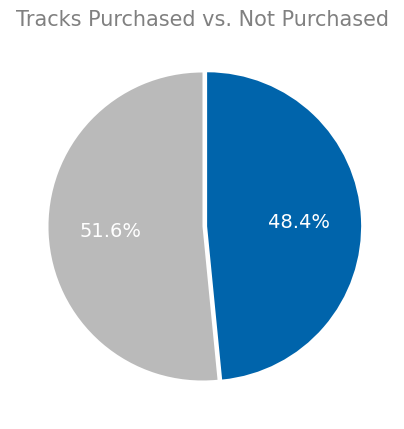

In [15]:
plt.pie(purchased_list,
       explode=(0, 0.03),
        startangle=90,
        autopct='%1.1f%%',
        textprops={'fontsize':14, 'color':'white'},
        colors=('#BABABA','#0064AB')
       )

plt.title('Tracks Purchased vs. Not Purchased', fontsize=15, color='gray')
fig=plt.gcf()
fig.set_size_inches(5, 5)
plt.show()

#### Observations

* Surprisingly, almost half of the track inventory at Chinhook has not sold. Lets take a look at the bottom performers and see of we can learn more:

In [16]:
q = """ 
Select ar.name artist_name,
    g.name genre,
    Count(il.track_id) units_sold
From track t
Left join invoice_line il on il.track_id = t.track_id
Inner join album al On al.album_id = t.album_id
Inner join artist ar On ar.artist_id = al.artist_id
Inner join genre as g On g.genre_id = t.genre_id

Group by artist_name
Having units_sold = 0
Order By units_sold;


"""
run_query(q)

,artist_name,genre,units_sold
0,Aaron Copland & London Symphony Orchestra,Classical,0
1,Academy of St. Martin in the Fields Chamber En...,Classical,0
2,"Academy of St. Martin in the Fields, John Birc...",Classical,0
3,"Academy of St. Martin in the Fields, Sir Nevil...",Classical,0
4,Adrian Leaper & Doreen de Feis,Classical,0
...,...,...,...
69,The Office,TV Shows,0
70,The Tea Party,Alternative & Punk,0
71,Ton Koopman,Classical,0
72,Toquinho & Vinícius,Bossa Nova,0


#### observations
74 artists have not sold any units, with most of these tracks belonging to the classical music genre.
Half of the company's inventory remains unsold, potentially tying up working capital without generating returns.
Depending on the payment arrangement with record labels, there are two scenarios to consider.
> 1. If Chinook pays a fixed fee to host these tracks, it might be wise to focus on more popular genres and discontinue signing less successful artists.

> 2. If Chinook pays the record label based on sales percentage, there is little downside to keeping the tracks in the store.

Regardless of the scenario, Chinook should explore ways to promote these low-selling artists. Suggestions could be integrated into the purchasing process or displayed on the website's cart page to increase exposure.

#### Albums vs Individual Tracks
The Chinook store allows customers to buy music in two ways: either as a complete album or as individual tracks. However, customers cannot buy a full album and then add individual tracks to the same purchase unless they select each track manually. When customers purchase albums, they are charged the same price as if they had bought each track separately.

Management is contemplating a new purchasing approach to cut costs. Instead of buying every track fron an album, they are considering purchasing only the most popular tracks from each album from record companies.

In [17]:
q = """ 
With invoice_data AS
    (
    Select invoice_id, Min(track_id) track_id
    From invoice_line
    Group BY 1
    ),
    
Album_purchased AS
(
    Select invoice_id,
    Case 
        WHEN
        (
            Select t2.track_id
            From track t1
            Join track t2
            On
            t1.album_id = t2.album_id
            where t1.track_id = inv.track_id
            
            Except
            
            Select il.track_id
            From invoice_line il
            Where il.invoice_id = inv.invoice_id
            
        ) IS NULL
        
        AND
        
        (
            Select il.track_id
            From invoice_line il
            Where il.invoice_id = inv.invoice_id
        
            Except
        
            Select t2.track_id
            From track t1
            Join track t2
            On
            t1.album_id = t2.album_id
            Where t1.track_id = inv.track_id
        ) IS NULL
    
        Then "Yes"
        Else "No"
        END as Purchased_Album
    From invoice_data inv
)

Select Purchased_Album,
    Count(invoice_id) As no_of_invoices,
    Cast(Count(invoice_id) AS Float) * 100 / 
    (Select Count(*) From Album_purchased) AS percent

From Album_purchased
Group BY 1
        
       

"""
run_query(q)


,Purchased_Album,no_of_invoices,percent
0,No,500,81.433225
1,Yes,114,18.566775


#### Results
> Most purchases (81%) from the store are individual tracks. However, in about 19% of cases,customers buy entire albums. Chinook should be careful with purchasing only the most popular tracks since it risks losing revenue from customers who purchase entire albums.

#### Conclusion and Recommendations

Throughout this project, we have provided insights and recommendations to help a fictional company enhance its profitability. By addressing various business scenarios, we've offered guidance on different aspects of the company's operations.
* **Genre Selection for New Albums:** Our analysis suggests that Chinook should prioritize genres with high popularity in the USA. We recommend selecting albums from Hip-Hop, Punk, and Pop genres, as they show promising sales potential. Additionally, keeping an eye on Rock songs, which constitute the majority of sales in the USA, could further boost revenue.
* **Employee Performance:** Among the sales representatives, Jane Peacock stands out as the top performer. While Steve Johnson appears to have lower total sales, it's important to note that he joined the team later than the others. Thus, he may require additional support and training to reach his full potential.
* **Sales Analysis by Country:** While the USA and Canada have the largest customer base, customers in these countries tend to spend less per transaction. On the other hand, the Czech Republic, India, and Portugal show higher average spending per customer. Launching targeted marketing campaigns in these regions could attract more customers and increase sales.
* **Track Purchasing Strategy:** Chinook's plan to focus solely on popular tracks may seem appealing, but it risks alienating customers who prefer to purchase entire albums. Conducting customer surveys and gathering feedback before implementing any changes would provide valuable insights into customer preferences.

In conclusion, by heeding these recommendations and staying attuned to customer needs and market trends, Chinook can optimize its operations, enhance customer satisfaction, and ultimately drive sustainable growth and profitability.